In [1]:
# load packages
#library(purrr)        |> suppressPackageStartupMessages()
#library(Rgraphviz)    |> suppressPackageStartupMessages()
#library(bnlearn)      |> suppressPackageStartupMessages()
#library(bnstruct)     |> suppressPackageStartupMessages()
#library(Rgraphviz)    |> suppressPackageStartupMessages()
source('test.r') |> suppressPackageStartupMessages()

In [2]:
data = asia()
data = impute(data)
data = imputed.data(data)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



In [3]:
# mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)
cat('The dataset dimensions are:', dim(DF))

colnames(DF) <- asia()@variables
head(DF)

The dataset dimensions are: 10000 8

,Asia,Tubercolosys,Smoke,LungCancer,Bronchitis,Either,X-ray,Dyspnea
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,1,1,1,2,1,2
2,2,1,1,1,1,1,2,1
3,1,1,2,1,1,1,2,1
4,2,1,2,1,1,1,2,1
5,2,1,2,1,1,1,1,2
6,2,1,2,1,1,1,2,2


In [4]:
today = 01072023 # default seed = 12345

In [16]:
struct = K2(n = ncol(DF), u = 3, D = DF, seed=today, num.iterations=5)

order = Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray DyspneaRunning iteration # 1 u = 3order = Smoke Bronchitis Dyspnea Asia LungCancer X-ray Tubercolosys EitherRunning iteration # 2 u = 3order = Bronchitis X-ray Asia Dyspnea Smoke Tubercolosys Either LungCancerRunning iteration # 3 u = 3order = Tubercolosys Asia X-ray Bronchitis Either Dyspnea LungCancer SmokeRunning iteration # 4 u = 3order = Tubercolosys LungCancer Either X-ray Smoke Bronchitis Dyspnea AsiaRunning iteration # 5 u = 3 DONE 

Total execution time: 0.09196562 mins


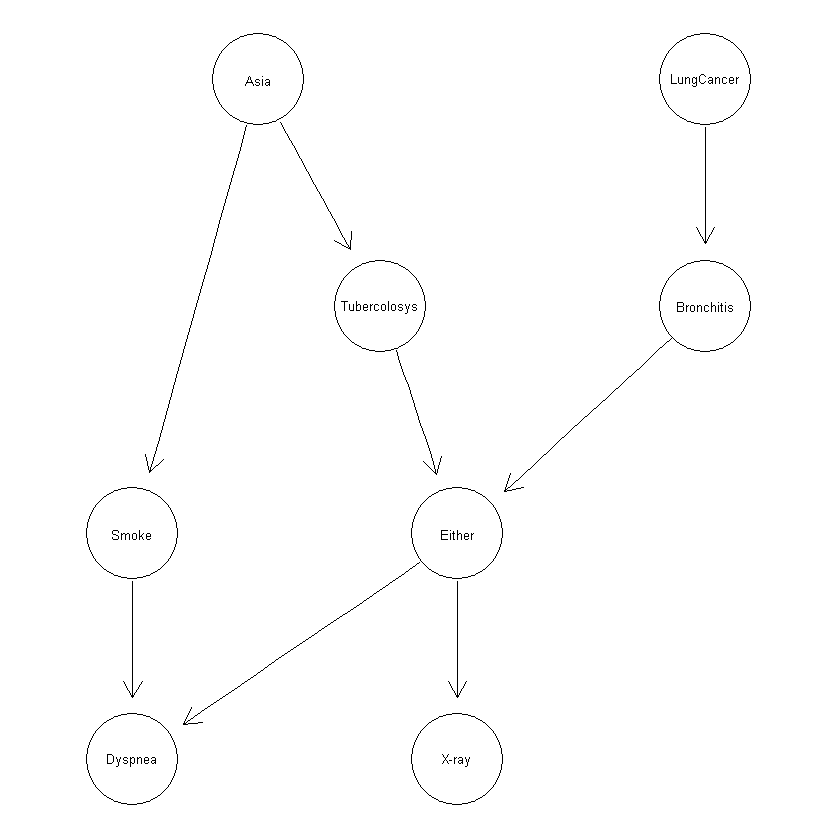

In [17]:
dag = get_gigi_dag(names(DF), struct$dag)
graphviz.plot(dag)

## `bnlearn` comparison

In [8]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes

ERROR: Error in check.fitting.method(method, data): parameter estimator 'bayes' may only be used with discrete data.


In [ ]:
# recall that when we make this test H_0 = (x, y) are independent
ci.test(x = 'Asia', y = 'Tubercolosys', z = 'X-ray', data = DF, test = 'mi')

# this shows that since the p-value is low, by 
# taking a 5% significance level we can reject the null 
# hyp and say that x3 and x2 depend on each other

In [ ]:
# this may say something about the structure we got through K2
ci.test(x = 'Dyspnea', y = 'Asia', z = 'Smoke', data = DF, test = 'mi')

In [ ]:
# evaluate the score of our network
score(dag, data = DF, type = 'bic')
score(dag, data = DF, type = 'bde')

In [ ]:
arc.strength(dag, data=DF, criterion="x2")

### This is the very same result that we get too!!! :)

In [ ]:
dataset <- asia()
net <- BN(dataset)

In [ ]:
net

In [ ]:
net <- learn.network(dataset)

In [ ]:
net

In [ ]:
plot(net)

In [ ]:
learned <- hc(DF)
modelstring(learned)

In [ ]:
graphviz.plot(learned)

In [ ]:
score(learned, data = DF, type = "bic")